# Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi, sin, cos

In [4]:
X = pd.read_csv('../data/input10m.csv', delimiter = ',',header=0)
X.drop('turn_side', axis=1, inplace=True)
X

,alt_sht,vel_sht,pit_sht,alt_tgt,vel_tgt,hdg_tgt,rgt_tgt,dist,delay,turn_dg,load_factor
0,13316.038251,438.745863,1.908201,27907.128742,463.298628,84.383929,-4.590786,25.597004,19.058029,159.088343,4.593384
1,25435.264167,416.465133,26.594504,43993.880664,337.501335,-93.558115,20.614895,10.163865,26.452231,89.708512,3.244332
2,33139.299770,523.386828,26.436640,22641.136495,332.064982,177.600262,23.062818,7.425074,27.863192,32.063032,2.123448
3,33481.879465,635.390712,21.888106,15588.464550,335.519153,117.557728,-7.844870,26.942946,25.075367,45.669971,2.388027
4,18341.336956,585.694312,-1.053212,40125.837356,640.387605,-152.031796,-2.417506,13.342091,20.591538,97.498343,3.395801
...,...,...,...,...,...,...,...,...,...,...,...
9999995,16581.577197,546.965957,-1.334925,15686.218241,495.792400,152.958399,-39.949577,12.749832,17.131976,112.264853,3.682928
9999996,10732.912526,344.788111,-27.795599,35917.362329,509.653487,-79.359408,-39.925346,38.734946,20.545121,117.313794,3.781102
9999997,28437.717599,673.643748,-13.269513,25662.989778,518.414488,128.629808,12.910449,37.137871,22.480017,111.907195,3.675973
9999998,42747.928886,364.004706,-23.931382,23577.780105,338.054422,174.338040,-54.809876,21.721125,23.095391,32.961043,2.140909


In [5]:
y = pd.read_csv('../data/output10m.csv')
y.columns = ['hit', 'miss_dist']
y.drop('hit', axis=1, inplace=True)
y

,miss_dist
0,29385.555083
1,4.009888
2,7.188287
3,2207.040506
4,2266.725655
...,...
9999995,3321.200568
9999996,62380.788999
9999997,43176.529032
9999998,1021.105241


In [6]:
df = pd.concat([X,y], join = 'outer', axis=1)
df.to_csv('../data/df10m.csv', index=False)
df

,alt_sht,vel_sht,pit_sht,alt_tgt,vel_tgt,hdg_tgt,rgt_tgt,dist,delay,turn_dg,load_factor,miss_dist
0,13316.038251,438.745863,1.908201,27907.128742,463.298628,84.383929,-4.590786,25.597004,19.058029,159.088343,4.593384,29385.555083
1,25435.264167,416.465133,26.594504,43993.880664,337.501335,-93.558115,20.614895,10.163865,26.452231,89.708512,3.244332,4.009888
2,33139.299770,523.386828,26.436640,22641.136495,332.064982,177.600262,23.062818,7.425074,27.863192,32.063032,2.123448,7.188287
3,33481.879465,635.390712,21.888106,15588.464550,335.519153,117.557728,-7.844870,26.942946,25.075367,45.669971,2.388027,2207.040506
4,18341.336956,585.694312,-1.053212,40125.837356,640.387605,-152.031796,-2.417506,13.342091,20.591538,97.498343,3.395801,2266.725655
...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,16581.577197,546.965957,-1.334925,15686.218241,495.792400,152.958399,-39.949577,12.749832,17.131976,112.264853,3.682928,3321.200568
9999996,10732.912526,344.788111,-27.795599,35917.362329,509.653487,-79.359408,-39.925346,38.734946,20.545121,117.313794,3.781102,62380.788999
9999997,28437.717599,673.643748,-13.269513,25662.989778,518.414488,128.629808,12.910449,37.137871,22.480017,111.907195,3.675973,43176.529032
9999998,42747.928886,364.004706,-23.931382,23577.780105,338.054422,174.338040,-54.809876,21.721125,23.095391,32.961043,2.140909,1021.105241


### Descriptive Statistics

In [7]:
df.describe().round(2)

,alt_sht,vel_sht,pit_sht,alt_tgt,vel_tgt,hdg_tgt,rgt_tgt,dist,delay,turn_dg,load_factor,miss_dist
count,10000000.00,10000000.00,10000000.00,10000000.00,10000000.00,10000000.00,10000000.00,10000000.00,10000000.00,10000000.00,10000000.00,10000000.00
mean,23000.00,500.00,-0.00,23000.00,500.00,-0.00,0.00,25.00,22.50,90.00,3.25,24589.62
std,12701.71,115.47,17.32,12701.71,115.47,103.92,34.64,11.55,4.33,51.96,1.01,20897.93
min,1000.00,300.00,-30.00,1000.00,300.00,-180.00,-60.00,5.00,15.00,0.00,1.50,0.00
25%,12000.00,400.00,-15.00,12000.00,400.00,-90.00,-30.00,15.00,18.75,45.00,2.38,4811.37
50%,23000.00,500.00,-0.00,23000.00,500.00,-0.00,-0.00,25.00,22.50,90.00,3.25,21404.50
75%,34000.00,600.00,15.00,34000.00,600.00,90.00,30.00,35.00,26.25,135.00,4.12,40591.04
max,45000.00,700.00,30.00,45000.00,700.00,180.00,60.00,45.00,30.00,180.00,5.00,95851.93


### Histograms and Boxplot

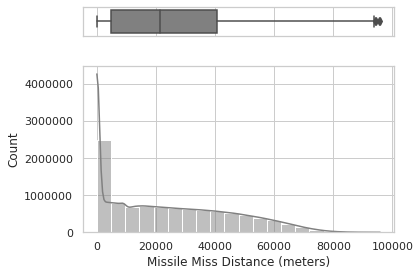

In [8]:
#plt.rcParams['text.usetex'] = True
#sns.set(font="serif")
sns.set(style="whitegrid")
#sns.set(style="ticks",font_scale=0.9)
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(x=df["miss_dist"], ax=ax_box, color='gray')
sns.histplot(data=df, x="miss_dist", ax=ax_hist, kde=True, color='gray', bins=20)
plt.xlabel('Missile Miss Distance (meters)')
sns.color_palette("flare", as_cmap=True)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
#plt.show()
#plt.savefig ('figures/histbox_eps.eps', format ='eps')
plt.savefig ('figures/histbox_400dpi.png', format ='png', dpi=400)

### Correlation

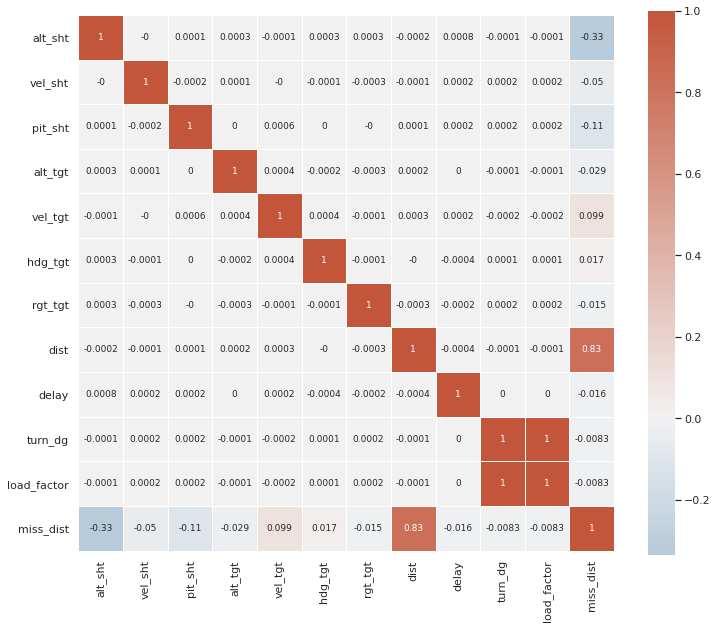

In [9]:
plt.rcParams.update({'font.size': 9})

corr_pearson = df.corr(method='pearson').round(4)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_pearson, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(corr_pearson, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 1.0}, annot=True);
#g = sns.heatmap(corr_pearson, cmap=cmap, vmax=1.0, vmin =-1.0, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 1.0}, annot=True);

#g = sns.heatmap(corr_pearson, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90)
plt.yticks(rotation=0) 

#plt.show()
#plt.savefig ('figures/corr_eps.eps', format ='eps')
plt.savefig ('figures/corr_png400.png', format ='png', dpi=400)

In [10]:
df.drop(['load_factor'], axis=1, inplace=True)

### Undersampling

In [11]:
df['vel_sht_mac'] = np.where(df['alt_sht'] > 10000 * 3.28084, df['vel_sht'] / (295 * 1.94384), df['vel_sht'] / (1.94384 * (341.0 - 0.004 * (df['alt_sht'] / 3.28084))) )
df['vel_tgt_mac'] = np.where(df['alt_tgt'] > 10000 * 3.28084, df['vel_tgt'] / (295 * 1.94384), df['vel_tgt'] / (1.94384 * (341.0 - 0.004 * (df['alt_tgt'] / 3.28084))) )

In [12]:
# Lista de Altitudes Base (em ft) - são usadas como altitudes de lançamento do Shooter
AltitudesBase = [None] * 31

AltitudesBase[0 ] =   500; AltitudesBase[1 ] =  2000; AltitudesBase[2 ] =  3500;
AltitudesBase[3 ] =  5000; AltitudesBase[4 ] =  6500; AltitudesBase[5 ] =  8000;
AltitudesBase[6 ] =  9500; AltitudesBase[7 ] = 11000; AltitudesBase[8 ] = 12500;
AltitudesBase[9 ] = 14000; AltitudesBase[10] = 15500; AltitudesBase[11] = 17000;
AltitudesBase[12] = 18500; AltitudesBase[13] = 20000; AltitudesBase[14] = 21500;
AltitudesBase[15] = 23000; AltitudesBase[16] = 24500; AltitudesBase[17] = 26000;
AltitudesBase[18] = 27500; AltitudesBase[19] = 29000; AltitudesBase[20] = 30500;
AltitudesBase[21] = 32000; AltitudesBase[22] = 33500; AltitudesBase[23] = 35000;
AltitudesBase[24] = 36500; AltitudesBase[25] = 38000; AltitudesBase[26] = 39500;
AltitudesBase[27] = 41000; AltitudesBase[28] = 42500; AltitudesBase[29] = 44000;
AltitudesBase[30] = 45500;

# Lista de velocidades (Mach) mínimas do Shooter (em função das altitudes base)
VelMinShooter = [None] * 31

VelMinShooter[0 ] = 0.45; VelMinShooter[1 ] = 0.45; VelMinShooter[2 ] = 0.45;
VelMinShooter[3 ] = 0.50; VelMinShooter[4 ] = 0.50; VelMinShooter[5 ] = 0.50;
VelMinShooter[6 ] = 0.55; VelMinShooter[7 ] = 0.55; VelMinShooter[8 ] = 0.55;
VelMinShooter[9 ] = 0.55; VelMinShooter[10] = 0.60; VelMinShooter[11] = 0.60;
VelMinShooter[12] = 0.60; VelMinShooter[13] = 0.65; VelMinShooter[14] = 0.65;
VelMinShooter[15] = 0.70; VelMinShooter[16] = 0.70; VelMinShooter[17] = 0.70;
VelMinShooter[18] = 0.75; VelMinShooter[19] = 0.75; VelMinShooter[20] = 0.80;
VelMinShooter[21] = 0.80; VelMinShooter[22] = 0.85; VelMinShooter[23] = 0.85;
VelMinShooter[24] = 0.90; VelMinShooter[25] = 0.90; VelMinShooter[26] = 0.90;
VelMinShooter[27] = 0.90; VelMinShooter[28] = 0.90; VelMinShooter[29] = 0.90;
VelMinShooter[30] = 0.90;

# Lista de velocidades (Mach) máximas do Shooter (em função das altitudes base) - CASO F-5
VelMaxShooter = [None] * 31

VelMaxShooter[0 ] = 0.90; VelMaxShooter[1 ] = 0.90; VelMaxShooter[2 ] = 0.90;
VelMaxShooter[3 ] = 0.90; VelMaxShooter[4 ] = 0.90; VelMaxShooter[5 ] = 0.90;
VelMaxShooter[6 ] = 0.95; VelMaxShooter[7 ] = 0.95; VelMaxShooter[8 ] = 0.95;
VelMaxShooter[9 ] = 0.95; VelMaxShooter[10] = 0.95; VelMaxShooter[11] = 0.95;
VelMaxShooter[12] = 0.95; VelMaxShooter[13] = 1.00; VelMaxShooter[14] = 1.00;
VelMaxShooter[15] = 1.05; VelMaxShooter[16] = 1.05; VelMaxShooter[17] = 1.05;
VelMaxShooter[18] = 1.05; VelMaxShooter[19] = 1.05; VelMaxShooter[20] = 1.10;
VelMaxShooter[21] = 1.10; VelMaxShooter[22] = 1.10; VelMaxShooter[23] = 1.10;
VelMaxShooter[24] = 1.10; VelMaxShooter[25] = 1.10; VelMaxShooter[26] = 1.10;
VelMaxShooter[27] = 1.10; VelMaxShooter[28] = 1.10; VelMaxShooter[29] = 1.10;
VelMaxShooter[30] = 1.10;

# Lista de altitudes mínimas do Target (em função das altitudes base)
AltMinTarget = [None] * 31

AltMinTarget[0 ] =   500; AltMinTarget[1 ] =   500; AltMinTarget[2 ] =  500;
AltMinTarget[3 ] =   500; AltMinTarget[4 ] =   500; AltMinTarget[5 ] =  500;
AltMinTarget[6 ] =   500; AltMinTarget[7 ] =   500; AltMinTarget[8 ] =  500;
AltMinTarget[9 ] =   500; AltMinTarget[10] =   500; AltMinTarget[11] =  500;
AltMinTarget[12] =   500; AltMinTarget[13] =   500; AltMinTarget[14] =  500;
AltMinTarget[15] =   500; AltMinTarget[16] =   500; AltMinTarget[17] =  500;
AltMinTarget[18] =   500; AltMinTarget[19] =   500; AltMinTarget[20] =  1000;
AltMinTarget[21] =  2500; AltMinTarget[22] =  4000; AltMinTarget[23] =  5500;
AltMinTarget[24] =  7000; AltMinTarget[25] =  8500; AltMinTarget[26] =  10000;
AltMinTarget[27] = 11500; AltMinTarget[28] = 13000; AltMinTarget[29] =  14500;
AltMinTarget[30] = 16000;

# Lista de altitudes máximas do Target (em função das altitudes base)
AltMaxTarget = [None] * 31

AltMaxTarget[0 ] = 20500; AltMaxTarget[1 ] = 22000; AltMaxTarget[2 ] = 23500;
AltMaxTarget[3 ] = 25000; AltMaxTarget[4 ] = 26500; AltMaxTarget[5 ] = 28000;
AltMaxTarget[6 ] = 29500; AltMaxTarget[7 ] = 31000; AltMaxTarget[8 ] = 32500;
AltMaxTarget[9 ] = 34000; AltMaxTarget[10] = 35500; AltMaxTarget[11] = 37000;
AltMaxTarget[12] = 38500; AltMaxTarget[13] = 40000; AltMaxTarget[14] = 41500;
AltMaxTarget[15] = 43000; AltMaxTarget[16] = 44500; AltMaxTarget[17] = 45500;
AltMaxTarget[18] = 45500; AltMaxTarget[19] = 45500; AltMaxTarget[20] = 45500;
AltMaxTarget[21] = 45500; AltMaxTarget[22] = 45500; AltMaxTarget[23] = 45500;
AltMaxTarget[24] = 45500; AltMaxTarget[25] = 45500; AltMaxTarget[26] = 45500;
AltMaxTarget[27] = 45500; AltMaxTarget[28] = 45500; AltMaxTarget[29] = 45500;
AltMaxTarget[30] = 45500;

#Lista de velocidades (Mach) mínimas do Target (em função das altitudes base) - CASO GENÉRICO
VelMinTarget = [None] * 31

VelMinTarget[0 ] = 0.30; VelMinTarget[1 ] = 0.30; VelMinTarget[2 ] = 0.30;
VelMinTarget[3 ] = 0.30; VelMinTarget[4 ] = 0.35; VelMinTarget[5 ] = 0.35;
VelMinTarget[6 ] = 0.35; VelMinTarget[7 ] = 0.35; VelMinTarget[8 ] = 0.35;
VelMinTarget[9 ] = 0.40; VelMinTarget[10] = 0.40; VelMinTarget[11] = 0.40;
VelMinTarget[12] = 0.40; VelMinTarget[13] = 0.45; VelMinTarget[14] = 0.45;
VelMinTarget[15] = 0.45; VelMinTarget[16] = 0.50; VelMinTarget[17] = 0.50;
VelMinTarget[18] = 0.50; VelMinTarget[19] = 0.50; VelMinTarget[20] = 0.55;
VelMinTarget[21] = 0.55; VelMinTarget[22] = 0.60; VelMinTarget[23] = 0.60;
VelMinTarget[24] = 0.60; VelMinTarget[25] = 0.65; VelMinTarget[26] = 0.65;
VelMinTarget[27] = 0.70; VelMinTarget[28] = 0.70; VelMinTarget[29] = 0.75;
VelMinTarget[30] = 0.75;

#Lista de velocidades (Mach) máximas do Target (em função das altitudes base) - CASO F-5
VelMaxTarget = [None] * 31

VelMaxTarget[0 ] = 0.90; VelMaxTarget[1 ] = 0.90; VelMaxTarget[2 ] = 0.90;
VelMaxTarget[3 ] = 0.90; VelMaxTarget[4 ] = 0.90; VelMaxTarget[5 ] = 0.90;
VelMaxTarget[6 ] = 0.95; VelMaxTarget[7 ] = 0.95; VelMaxTarget[8 ] = 0.95;
VelMaxTarget[9 ] = 0.95; VelMaxTarget[10] = 0.95; VelMaxTarget[11] = 0.95;
VelMaxTarget[12] = 0.95; VelMaxTarget[13] = 1.00; VelMaxTarget[14] = 1.00;
VelMaxTarget[15] = 1.05; VelMaxTarget[16] = 1.05; VelMaxTarget[17] = 1.05;
VelMaxTarget[18] = 1.05; VelMaxTarget[19] = 1.05; VelMaxTarget[20] = 1.10;
VelMaxTarget[21] = 1.10; VelMaxTarget[22] = 1.10; VelMaxTarget[23] = 1.10;
VelMaxTarget[24] = 1.10; VelMaxTarget[25] = 1.10; VelMaxTarget[26] = 1.10;
VelMaxTarget[27] = 1.10; VelMaxTarget[28] = 1.10; VelMaxTarget[29] = 1.10;
VelMaxTarget[30] = 1.10;

In [13]:
dfi = pd.DataFrame(columns=df.columns)

for i in range(31):
    
    if i == 0:
        df0 = df[(df['alt_sht']>0) & (df['alt_sht']<AltitudesBase[i]) & 
                 (df['vel_sht_mac']>VelMinShooter[i]) & (df['vel_sht_mac']<VelMaxShooter[i]) & 
                 (df['alt_tgt']>AltMinTarget[i]) & (df['alt_tgt']<AltMaxTarget[i]) & 
                 (df['vel_tgt_mac']>VelMinTarget[i]) & (df['vel_tgt_mac']<VelMaxTarget[i])]
    else:
        dfi = df[(df['alt_sht']>AltitudesBase[i-1]) & (df['alt_sht']<AltitudesBase[i]) & 
                 (df['vel_sht_mac']>VelMinShooter[i]) & (df['vel_sht_mac']<VelMaxShooter[i]) & 
                 (df['alt_tgt']>AltMinTarget[i]) & (df['alt_tgt']<AltMaxTarget[i]) & 
                 (df['vel_tgt_mac']>VelMinTarget[i]) & (df['vel_tgt_mac']<VelMaxTarget[i])]
    
    df0 = pd.concat([df0,dfi])

In [14]:
df0.drop(['vel_sht_mac','vel_tgt_mac'], axis=1, inplace=True)

In [15]:
df = df0

### Outliers

In [16]:
from numpy import percentile

outliers_cols = df.columns
outliers = {}
outliers_removed = {}
for idx, col in enumerate(outliers_cols):
    # calculate interquartile range
    data = df[col]
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print(f'Variable ({idx+1}): {col}\nPercentiles: 25th = {q25:.3f}, 75th = { q75:.3f}, IQR = {iqr:.3f}')
    # calculate the outlier cutoff
    k = 1.5
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers[col] = [x for x in data if x < lower or x > upper]
    print(f'Identified outliers: {len(outliers[col])}')
    # remove outliers
    outliers_removed[col] = [x for x in data if x >= lower and x <= upper]
    print(f'Non-outlier observations: {len(outliers_removed[col])}\n')

Variable (1): alt_sht
Percentiles: 25th = 12367.062, 75th = 29201.757, IQR = 16834.695
Identified outliers: 0
Non-outlier observations: 2855055

Variable (2): vel_sht
Percentiles: 25th = 462.204, 75th = 572.356, IQR = 110.152
Identified outliers: 0
Non-outlier observations: 2855055

Variable (3): pit_sht
Percentiles: 25th = -14.999, 75th = 15.013, IQR = 30.012
Identified outliers: 0
Non-outlier observations: 2855055

Variable (4): alt_tgt
Percentiles: 25th = 10282.467, 75th = 28622.248, IQR = 18339.780
Identified outliers: 0
Non-outlier observations: 2855055

Variable (5): vel_tgt
Percentiles: 25th = 393.100, 75th = 544.187, IQR = 151.086
Identified outliers: 0
Non-outlier observations: 2855055

Variable (6): hdg_tgt
Percentiles: 25th = -89.881, 75th = 90.078, IQR = 179.960
Identified outliers: 0
Non-outlier observations: 2855055

Variable (7): rgt_tgt
Percentiles: 25th = -29.991, 75th = 30.019, IQR = 60.009
Identified outliers: 0
Non-outlier observations: 2855055

Variable (8): dist
P

### Save the final dataframe

In [17]:
df.to_csv(f'../data/df_eda.csv', index=False)
df

,alt_sht,vel_sht,pit_sht,alt_tgt,vel_tgt,hdg_tgt,rgt_tgt,dist,delay,turn_dg,miss_dist
413,1900.094833,516.257515,-9.115002,9411.674491,389.059516,-179.508724,28.173016,22.107204,24.962478,5.107690,12840.388130
568,1668.030968,384.114554,-9.291737,6424.170046,538.332386,150.564222,21.635788,42.957053,27.889110,140.635249,68935.014560
722,1430.046650,552.946387,-16.802029,11292.969864,536.495037,-71.258760,47.099787,17.904767,28.814680,13.967480,15869.019903
1348,1819.812543,524.681447,2.326836,3983.583185,354.232941,-147.655375,-25.450868,38.858097,25.736859,47.110727,55065.305561
1805,1348.600786,367.370819,13.801087,8269.417066,533.015720,85.274320,-47.226769,27.176054,17.912385,137.619306,47172.155816
...,...,...,...,...,...,...,...,...,...,...,...
9998057,44376.436551,544.473934,-4.773440,16868.508237,620.848721,83.157352,32.501000,32.909110,21.978916,71.510008,36040.502363
9998811,44396.062176,555.458863,-12.651975,44331.857296,626.047542,28.146378,-26.005787,42.962424,27.934929,145.538436,45979.441460
9999180,44373.716110,609.965112,-24.517640,16754.178594,580.015564,168.638639,-16.550910,43.350364,15.081863,79.534893,25623.383672
9999183,44432.347726,617.846742,11.024131,24860.378262,658.322238,-145.516952,14.465779,40.760772,26.462078,84.072836,9995.672595


# Feature Engineering

In [19]:
df2 = df.copy()
df2['sin(pit_sht)'] = df2['hdg_tgt'].apply(lambda x: sin(x*pi/180))
df2['cos(pit_sht)'] = df2['hdg_tgt'].apply(lambda x: cos(x*pi/180))
df2['sin(hdg_tgt)'] = df2['hdg_tgt'].apply(lambda x: sin(x*pi/180))
df2['cos(hdg_tgt)'] = df2['hdg_tgt'].apply(lambda x: cos(x*pi/180))
df2['sin(rgt_tgt)'] = df2['rgt_tgt'].apply(lambda x: sin(x*pi/180))
df2['cos(rgt_tgt)'] = df2['rgt_tgt'].apply(lambda x: cos(x*pi/180))
df2['sin(turn_dg)'] = df2['turn_dg'].apply(lambda x: sin(x*pi/180))
df2['cos(turn_dg)'] = df2['turn_dg'].apply(lambda x: cos(x*pi/180))
df2.drop(['pit_sht', 'hdg_tgt', 'rgt_tgt', 'turn_dg'], axis=1, inplace=True)
df2 = df2[['alt_sht', 'vel_sht', 'alt_tgt', 'vel_tgt', 'dist', 'sin(pit_sht)', 'cos(pit_sht)', 'sin(hdg_tgt)', 
           'cos(hdg_tgt)', 'sin(rgt_tgt)', 'cos(rgt_tgt)', 'sin(turn_dg)', 'cos(turn_dg)', 'delay', 'miss_dist']]
df2.to_csv(f'../data/df_eda_v2.csv', index=False)

In [20]:
df3 = df.copy()
df3['sin(pit_sht)'] = df3['hdg_tgt'].apply(lambda x: sin(x*pi/180))
df3['cos(pit_sht)'] = df3['hdg_tgt'].apply(lambda x: cos(x*pi/180))
df3['sin(hdg_tgt)'] = df3['hdg_tgt'].apply(lambda x: sin(x*pi/180))
df3['cos(hdg_tgt)'] = df3['hdg_tgt'].apply(lambda x: cos(x*pi/180))
df3['sin(rgt_tgt)'] = df3['rgt_tgt'].apply(lambda x: sin(x*pi/180))
df3['cos(rgt_tgt)'] = df3['rgt_tgt'].apply(lambda x: cos(x*pi/180))
df3.drop(['pit_sht', 'hdg_tgt', 'rgt_tgt'], axis=1, inplace=True)
df3 = df3[['alt_sht', 'vel_sht', 'alt_tgt', 'vel_tgt', 'dist', 'sin(pit_sht)', 'cos(pit_sht)', 'sin(hdg_tgt)', 
           'cos(hdg_tgt)', 'sin(rgt_tgt)', 'cos(rgt_tgt)', 'turn_dg', 'delay', 'miss_dist']]
df3.to_csv(f'../data/df_eda_v3.csv', index=False)

In [26]:
df4 = df.copy()
df4['sin(hdg_tgt)'] = df4['hdg_tgt'].apply(lambda x: sin(x*pi/180))
df4['cos(hdg_tgt)'] = df4['hdg_tgt'].apply(lambda x: cos(x*pi/180))
df4['sin(rgt_tgt)'] = df4['rgt_tgt'].apply(lambda x: sin(x*pi/180))
df4['cos(rgt_tgt)'] = df4['rgt_tgt'].apply(lambda x: cos(x*pi/180))
df4.drop(['hdg_tgt', 'rgt_tgt'], axis=1, inplace=True)
df4= df4[['alt_sht', 'vel_sht', 'alt_tgt', 'vel_tgt', 'dist', 'pit_sht', 'sin(hdg_tgt)', 
           'cos(hdg_tgt)', 'sin(rgt_tgt)', 'cos(rgt_tgt)', 'turn_dg', 'delay', 'miss_dist']]
df4.to_csv(f'../data/df_eda_v4.csv', index=False)

In [27]:
df

,alt_sht,vel_sht,pit_sht,alt_tgt,vel_tgt,hdg_tgt,rgt_tgt,dist,delay,turn_dg,miss_dist
413,1900.094833,516.257515,-9.115002,9411.674491,389.059516,-179.508724,28.173016,22.107204,24.962478,5.107690,12840.388130
568,1668.030968,384.114554,-9.291737,6424.170046,538.332386,150.564222,21.635788,42.957053,27.889110,140.635249,68935.014560
722,1430.046650,552.946387,-16.802029,11292.969864,536.495037,-71.258760,47.099787,17.904767,28.814680,13.967480,15869.019903
1348,1819.812543,524.681447,2.326836,3983.583185,354.232941,-147.655375,-25.450868,38.858097,25.736859,47.110727,55065.305561
1805,1348.600786,367.370819,13.801087,8269.417066,533.015720,85.274320,-47.226769,27.176054,17.912385,137.619306,47172.155816
...,...,...,...,...,...,...,...,...,...,...,...
9998057,44376.436551,544.473934,-4.773440,16868.508237,620.848721,83.157352,32.501000,32.909110,21.978916,71.510008,36040.502363
9998811,44396.062176,555.458863,-12.651975,44331.857296,626.047542,28.146378,-26.005787,42.962424,27.934929,145.538436,45979.441460
9999180,44373.716110,609.965112,-24.517640,16754.178594,580.015564,168.638639,-16.550910,43.350364,15.081863,79.534893,25623.383672
9999183,44432.347726,617.846742,11.024131,24860.378262,658.322238,-145.516952,14.465779,40.760772,26.462078,84.072836,9995.672595
